In [2]:
from numpy import *
from matplotlib.pyplot import *
import numpy as np
import random
from scipy import *
import scipy as sp
from scipy.linalg import expm, sinm, cosm
import scipy.integrate as integrate

# Classical Random Walk

This code may be a bit slow. Wait for more than 1 mins please. I have not optimized it.

In [5]:
sigmaRW=[] #record the standart deviation of the Random Walk

particle_num=10000 #randomly propagate 10000 particles

for n in range(0,101):
    step = n
    particle=[0]*particle_num
    for i in range(step):
        for j in range(len(particle)):
            movement = [1,-1]
            particle[j]+=random.choice(movement) #randomly push the particles back and forth


    count = 0
    distribution = []
    for i in range(-100,100):
        for j in range(particle_num-1):
            if particle[j] == i:
                count+=1
        distribution.append(count)
        count = 0

    for i in range(len(distribution)):
        distribution[i]=distribution[i]/particle_num
    
    sigmaRW.append(std(particle))
        
x = []
y = distribution
for i in range(-100,100):
    x.append(i)

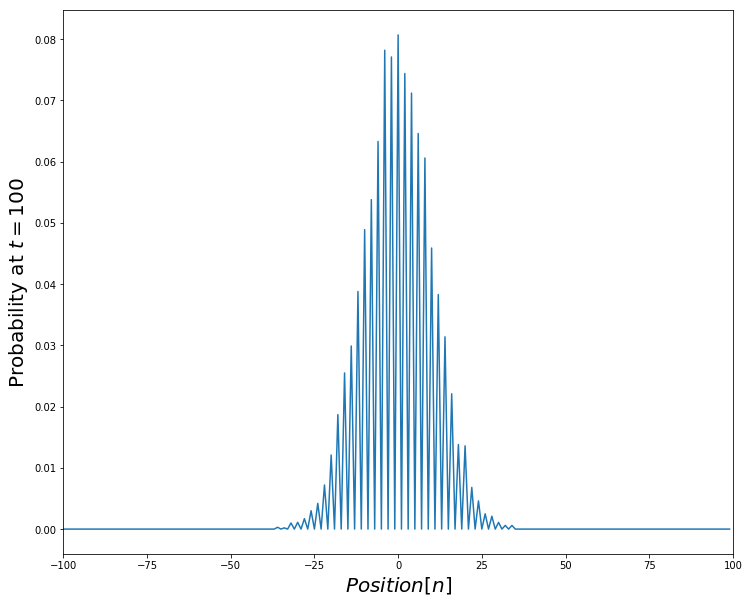

In [6]:
fig = figure(figsize=(12, 10))
ax = fig.add_subplot(111)
plot(x, y,'-')
#plot(x, y,'o')
xlim(-100, 100)
xlabel('$Position [n]$',size=20)
ylabel('Probability at $t = 100$',size=20)
show()

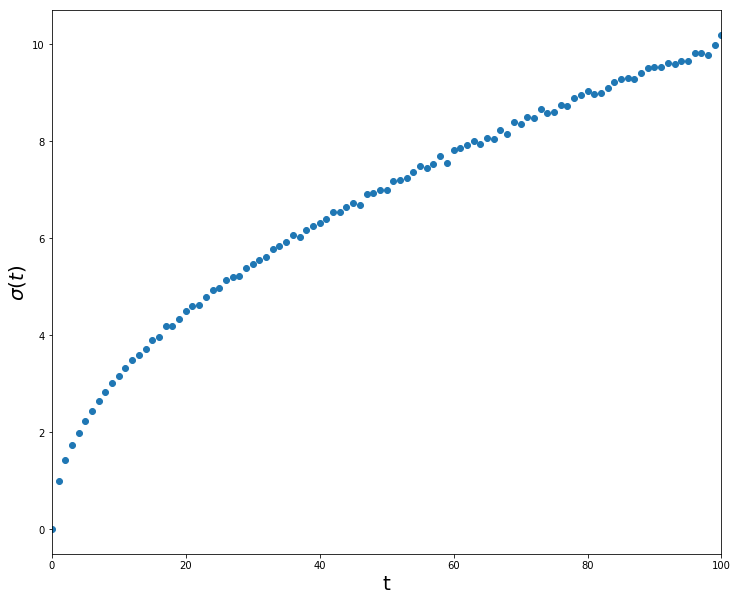

In [7]:
nstep =[]
for i in range(0,101):
    nstep.append(i)
    
fig = figure(figsize=(12, 10))
ax = fig.add_subplot(111)
#plot(nstep, sigma,'-')
plot(nstep, sigmaRW,'o')
xlim(0, 100)
xlabel('t',size=20)
ylabel('$\sigma(t)$',size=20)
#legend()
show()

# Quantum Random Walk

This code is modified based on the DTQW code on Susan Stepney's blog:https://susan-stepney.blogspot.com/2014/02/mathjax.html.

## Symmetric DTQW

In [49]:
sigmaSQW=[] # will record the standard deviation of the symmetric DTQW latter

for n in range(0,101):
    
    N = n      # number of random steps
    P = 2*N+1    # number of positions
    
    spin0 = array([1, 0])  # |0>
    spin1 = array([0, 1])  # |1>
    
    C00 = outer(coin0, coin0)  # |0><0| 
    C01 = outer(coin0, coin1)  # |0><1| 
    C10 = outer(coin1, coin0)  # |1><0| 
    C11 = outer(coin1, coin1)  # |1><1| 
    
    
    C_hat = (C00 + C01 + C10 - C11)/sqrt(2.)
    
    ShiftPlus = roll(eye(P), 1, axis=0)#roll the matrix so that S(+)(1,0,0,0....) -> (0,1,0,0....)
    ShiftMinus = roll(eye(P), -1, axis=0)#roll the matrix so that S(-)(1,0,0,0....) -> (0,0,0,0...0,1)
    S_hat = kron(ShiftPlus, C00) + kron(ShiftMinus, C11)#condition selection operator
    
    U = S_hat.dot(kron(eye(P), C_hat))#Total unitary operator
    
    posn0 = zeros(P)
    posn0[N] = 1    
    psi0 = kron(posn0,(coin0+coin1*1j)/sqrt(2.))

    psiN = linalg.matrix_power(U, N).dot(psi0)

    prob_sym_DTQW = empty(P)
    for k in range(P): #meaure the state after N step
        posn = zeros(P)
        posn[k] = 1     
        M_hat_k = kron( outer(posn,posn), eye(2))
        proj = M_hat_k.dot(psiN)
        prob_sym_DTQW[k] = proj.dot(proj.conjugate()).real

    #Get the standard deviation of the Prob dist of the final state
    nlattice =[]
    for i in range(-n,n+1):
        nlattice.append(i)
    mean_nsquare = 0
    mean_n = 0
    for i in range(len(prob_sym_DTQW)):
        mean_nsquare += (nlattice[i]**2)*prob_sym_DTQW[i]
        mean_n += nlattice[i]*prob_sym_DTQW[i]

    sigmaSQW.append(sqrt(mean_nsquare-mean_n))



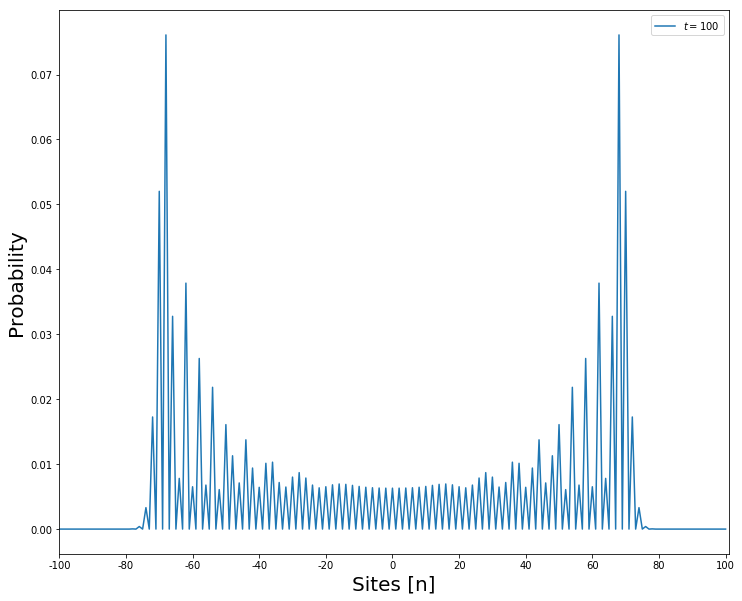

In [50]:
fig = figure(figsize=(12, 10))
ax = fig.add_subplot(111)

plot(arange(P), prob_sym_DTQW, label='$t=100$')
loc = range (0, P, P//10) #Location of ticks
xticks(loc)
xlim(0, P)
ax.set_xticklabels(range (-N, N+1, int(P / 10)))
xlabel('Sites [n]', size=20)
ylabel('Probability', size=20)
legend()
show()

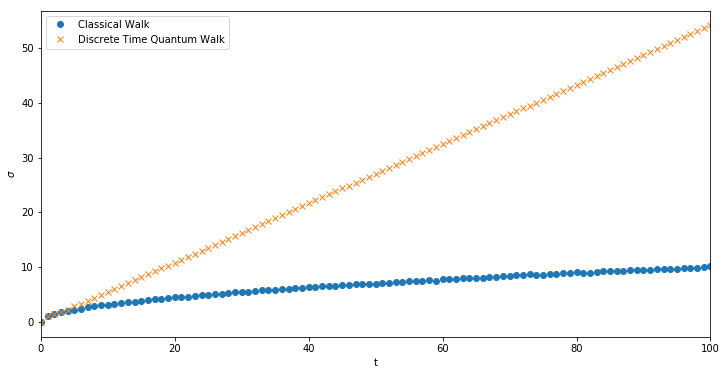

In [10]:
fig = figure(figsize=(12, 6))
ax = fig.add_subplot(111)
plot(nstep, sigmaRW,'o',label='Classical Walk')
plot(nstep, sigmaSQW,'x', label = 'Discrete Time Quantum Walk')
xlim(0, 100)
xlabel('t')
ylabel('$\sigma$')
legend()
show()

## Asymmetric DTQW

### Left Skew

In [11]:
sigmaASQW=[]
for n in range(0,101):
    
    N = n      # number of random steps
    P = 2*N+1    # number of positions
    
    coin0 = array([1, 0])  # |0>
    coin1 = array([0, 1])  # |1>
    
    C00 = outer(coin0, coin0)  # |0><0| 
    C01 = outer(coin0, coin1)  # |0><1| 
    C10 = outer(coin1, coin0)  # |1><0| 
    C11 = outer(coin1, coin1)  # |1><1| 
    
    
    C_hat = (C00 + C01 + C10 - C11)/sqrt(2.)
    
    ShiftPlus = roll(eye(P), 1, axis=0)
    ShiftMinus = roll(eye(P), -1, axis=0)
    S_hat = kron(ShiftPlus, C00) + kron(ShiftMinus, C11)
    
    U = S_hat.dot(kron(eye(P), C_hat))
    
    posn0 = zeros(P)
    posn0[N] = 1     
    psi0 = kron(posn0,coin1)

    psiN = linalg.matrix_power(U, N).dot(psi0)

    prob = empty(P)
    for k in range(P):
        posn = zeros(P)
        posn[k] = 1     
        M_hat_k = kron( outer(posn,posn), eye(2))
        proj = M_hat_k.dot(psiN)
        prob[k] = proj.dot(proj.conjugate()).real

    nlattice =[]
    for i in range(-n,n+1):
        nlattice.append(i)
    mean_nsquare = 0
    mean_n = 0
    for i in range(len(prob)):
        mean_nsquare += (nlattice[i]**2)*prob[i]
        mean_n += nlattice[i]*prob[i]

    sigmaASQW.append(sqrt(mean_nsquare-mean_n))


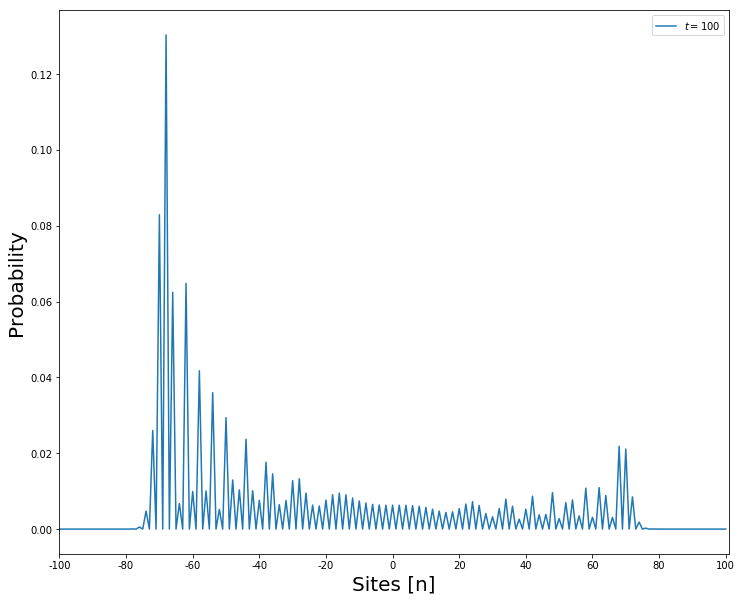

In [12]:
fig = figure(figsize=(12, 10))
ax = fig.add_subplot(111)

plot(arange(P), prob, label='$t=100$')
loc = range (0, P, P//10) #Location of ticks
xticks(loc)
xlim(0, P)
ax.set_xticklabels(range (-N, N+1, int(P / 10)))
xlabel('Sites [n]', size=20)
ylabel('Probability', size=20)
legend()
show()

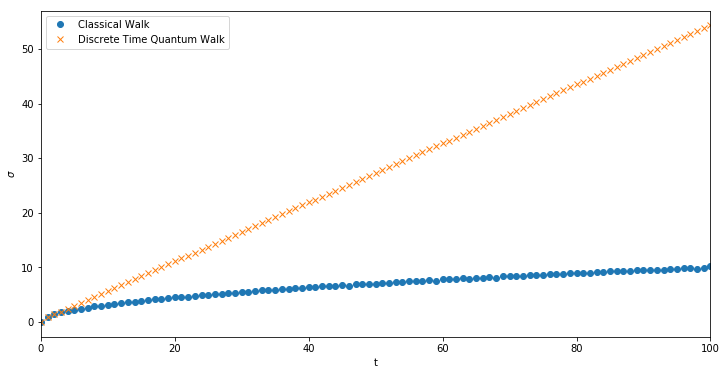

In [13]:
fig = figure(figsize=(12, 6))
ax = fig.add_subplot(111)
#plot(nstep, sigma,'-')
plot(nstep, sigmaRW,'o',label='Classical Walk')
plot(nstep, sigmaASQW,'x', label = 'Discrete Time Quantum Walk')
xlim(0, 100)
xlabel('t')
ylabel('$\sigma$')
legend()
show()

### Right skew

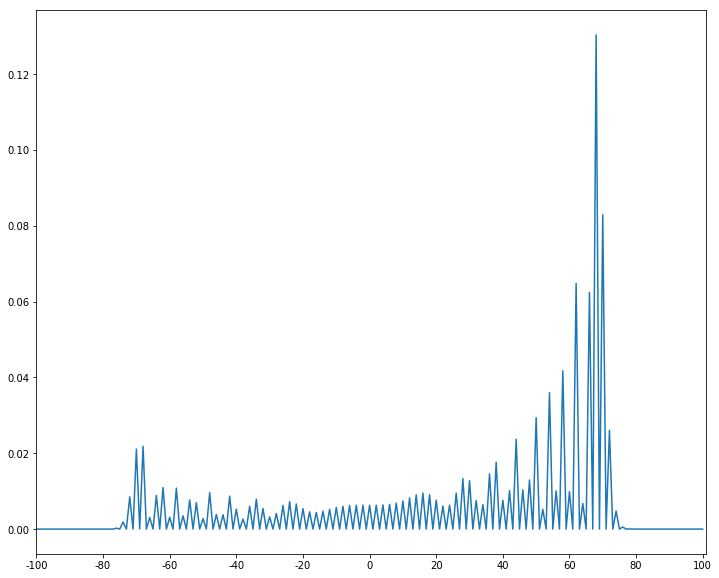

In [15]:
posn0 = zeros(P)
posn0[N] = 1     # array indexing starts from 0, so index N is the central posn
psi0 = kron(posn0,coin0)

psiN = linalg.matrix_power(U, N).dot(psi0)

prob = empty(P)
for k in range(P):
    posn = zeros(P)
    posn[k] = 1     
    M_hat_k = kron( outer(posn,posn), eye(2))
    proj = M_hat_k.dot(psiN)
    prob[k] = proj.dot(proj.conjugate()).real
    
fig = figure(figsize=(12, 10))
ax = fig.add_subplot(111)

plot(arange(P), prob)
loc = range (0, P, int(P/10)) #Location of ticks
xticks(loc)
xlim(0, P)
ax.set_xticklabels(range (-N, N+1, int(P / 10)))

show()

## Continuous Time Quantum Walk

In [21]:
sigmaCTQW=[]
for n in range(0,101):
    t=n
    N = n
    P = 2*N+1
    gamma = 1/(2*np.sqrt(2))

    H = []

    for i in range(P):
        for j in range(P):
            if j==i:
                H.append(2*gamma)
            elif j==i+1 or j==i-1:
                H.append(-gamma)
            else:
                H.append(0)

    H=np.asarray(H)
    H=H.reshape(P,P)
    U = expm(-1.j*H*t)

    posn0 = zeros(P)
    posn0[N] = 1 
    psi0=posn0

    psiN = U.dot(psi0)

    prob = empty(P)
    for k in range(P):
        posn = zeros(P)
        posn[k] = 1     
        M_hat_k = outer(posn,posn)
        proj = M_hat_k.dot(psiN)
        prob[k] = proj.dot(proj.conjugate()).real
        
    nlattice =[]
    
    for i in range(-n,n+1):
        nlattice.append(i)
    mean_nsquare = 0
    mean_n = 0
    
    for i in range(len(prob)):
        mean_nsquare += (nlattice[i]**2)*prob[i]
        mean_n += nlattice[i]*prob[i]

    sigmaCTQW.append(sqrt(mean_nsquare-mean_n))

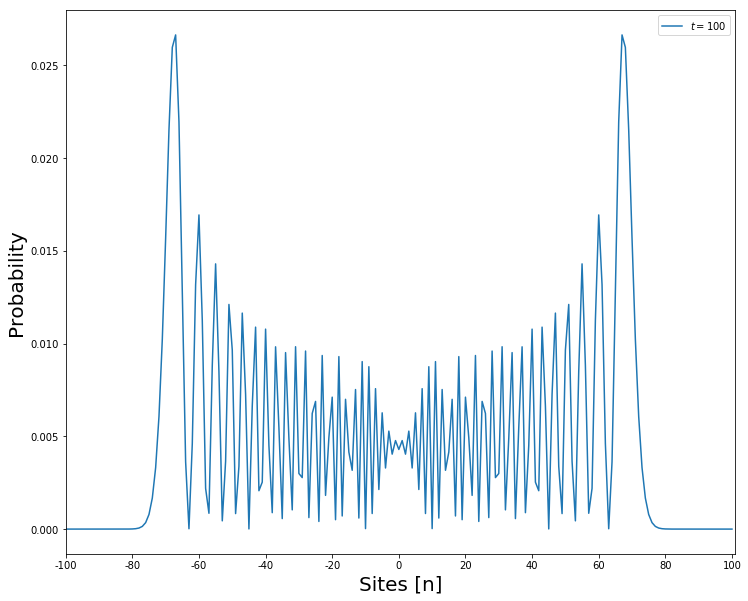

In [22]:
fig = figure(figsize=(12, 10))
ax = fig.add_subplot(111)

plot(arange(P), prob, label='$t=100$')
#plot(arange(P), prob, 'o')
loc = range (0, P, P//10) #Location of ticks
xticks(loc)
xlim(0, P)
ax.set_xticklabels(range (-N, N+1, int(P / 10)))
xlabel('Sites [n]', size=20)
ylabel('Probability', size=20)
legend()
show()

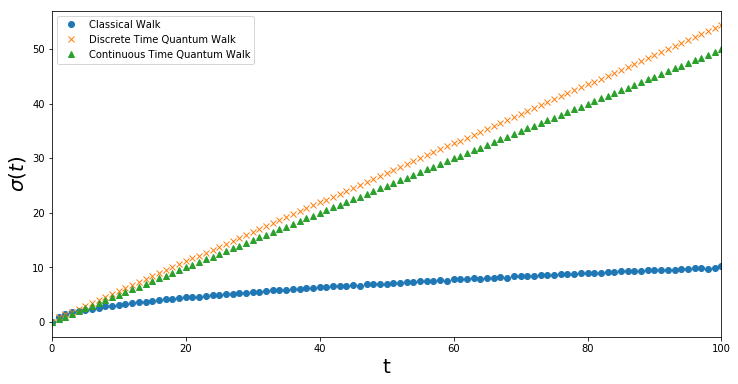

In [23]:
fig = figure(figsize=(12, 6))
ax = fig.add_subplot(111)
#plot(nstep, sigma,'-')
plot(nstep, sigmaRW,'o',label='Classical Walk')
plot(nstep, sigmaASQW,'x', label = 'Discrete Time Quantum Walk')
plot(nstep, sigmaCTQW,'^', label = 'Continuous Time Quantum Walk')
xlim(0, 100)
xlabel('t',size=20)
ylabel('$\sigma(t)$',size =20)
legend()
show()

# Comparison between Analytical Solution and DTQW

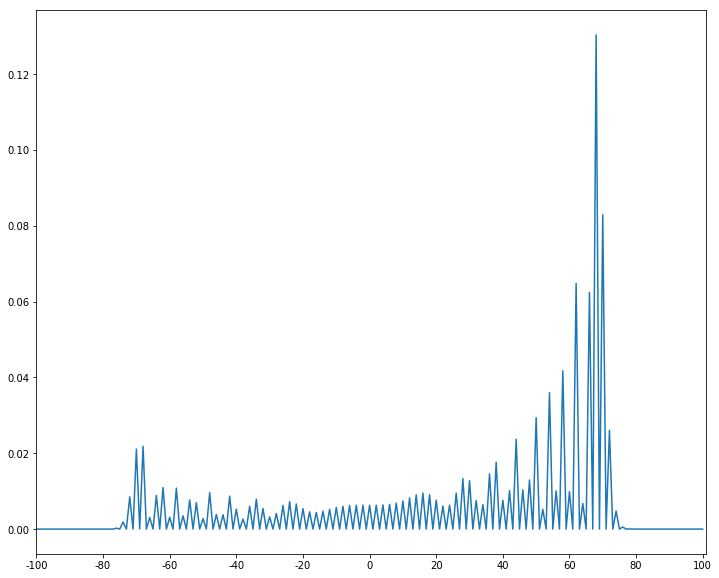

In [31]:
for n in range(100,101):
    
    N = n      # number of random steps
    P = 2*N+1    # number of positions
    
    coin0 = array([1, 0])  # |0>
    coin1 = array([0, 1])  # |1>
    
    C00 = outer(coin0, coin0)  # |0><0| 
    C01 = outer(coin0, coin1)  # |0><1| 
    C10 = outer(coin1, coin0)  # |1><0| 
    C11 = outer(coin1, coin1)  # |1><1| 
    
    
    C_hat = (C00 + C01 + C10 - C11)/sqrt(2.)
    
    ShiftPlus = roll(eye(P), 1, axis=0)
    ShiftMinus = roll(eye(P), -1, axis=0)
    S_hat = kron(ShiftPlus, C00) + kron(ShiftMinus, C11)
    
    U = S_hat.dot(kron(eye(P), C_hat))
    
    posn0 = zeros(P)
    posn0[N] = 1     
    psi0 = kron(posn0,coin0)

    psiN = linalg.matrix_power(U, N).dot(psi0)

    prob = empty(P)
    for k in range(P):
        posn = zeros(P)
        posn[k] = 1     
        M_hat_k = kron( outer(posn,posn), eye(2))
        proj = M_hat_k.dot(psiN)
        prob[k] = proj.dot(proj.conjugate()).real


fig = figure(figsize=(12, 10))
ax = fig.add_subplot(111)

plot(arange(P), prob)
loc = range (0, P, P//10) 
xticks(loc)
xlim(0, P)
ax.set_xticklabels(range (-N, N+1, int(P / 10)))

show()

In [32]:
def psi0_integrand(k, t, x):
    wk = arcsin(sin(k)/sqrt(2))
    return (1+cos(k)/sqrt(1+cos(k)**2))*exp(-1j*(wk*t-k*x))/(2*pi)

def psi1_integrand(k, t, x):
    wk = arcsin(sin(k)/sqrt(2))
    return (exp(1j*k)/sqrt(1+cos(k)**2))*exp(-1j*(wk*t-k*x))/(2*pi)


In [33]:
def complex_quadrature(func, a, b, **kwargs):
    def real_func(k,t,x):
        return sp.real(func(k,t,x))
    def imag_func(k,t,x):
        return sp.imag(func(k,t,x))
    real_integral = integrate.quad(real_func, a, b, limit=200, **kwargs)
    imag_integral = integrate.quad(imag_func, a, b, limit=200, **kwargs)
    return real_integral[0] + 1j*imag_integral[0]# real_integral[1:], imag_integral[1:])

In [34]:
nlattice =[]
for i in range(-100,100+1):
    nlattice.append(i)

In [35]:
psi0=[]
psi1=[]
even = -100
for i in nlattice:
    t=100
    x=i
    if x%2 ==0:
        psi0.append(complex_quadrature(psi0_integrand, -pi,pi, args=(t, x)))
        psi1.append(complex_quadrature(psi1_integrand, -pi,pi, args=(t, x)))
    else:
        psi0.append(0)
        psi1.append(0)

In [36]:
psi_Analystical=[]
for i in range(len(psi0)):
    psi_Analystical.append(psi0[i].conjugate() *psi0[i] +psi1[i].conjugate() *psi1[i])

/Users/chenwu/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


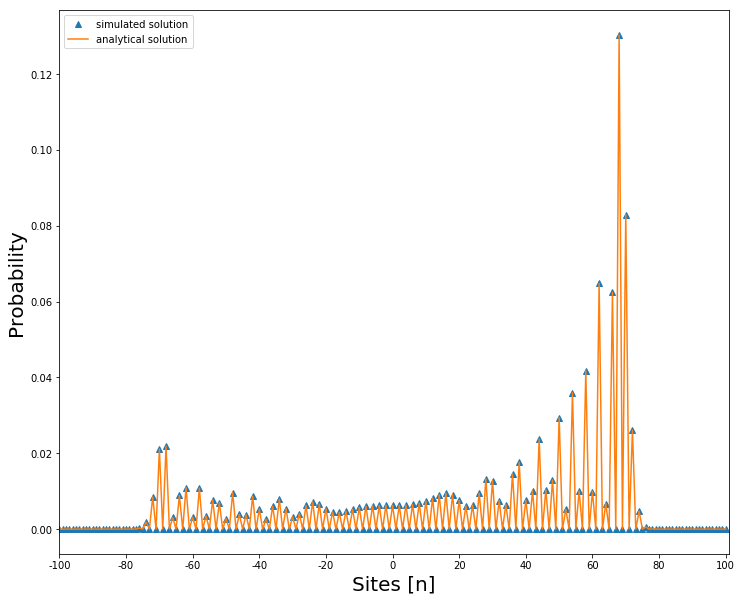

In [37]:

fig = figure(figsize=(12, 10))
ax = fig.add_subplot(111)

N=100
plot(arange(P), prob,'^',label='simulated solution',)
plot(arange(P), psi_Analystical,label='analytical solution')
loc = range (0, P, P//10) #Location of ticks
xticks(loc)
xlim(0, P)
ax.set_xticklabels(range (-N, N+1, P // 10))
xlabel('Sites [n]', size=20)
ylabel('Probability', size=20)
legend()
show()

# Quantum Walk on 1D Topological Phase Transition

In [132]:
N = 100
P = 2*N+1 

coin0 = array([1, 0])  
coin1 = array([0, 1])  

C00 = outer(coin0, coin0)   
C01 = outer(coin0, coin1)  
C10 = outer(coin1, coin0)  
C11 = outer(coin1, coin1)  

def Ry(theta):
    y_SU2 = cos(theta/2)*C00+sin(theta/2)*C10-sin(theta/2)*C01+cos(theta/2)*C11
    #array([[cos(theta/2), -sin(theta/2)],[sin(theta/2), cos(theta/2)]])
    return kron(eye(P),y_SU2)

ShiftPlus = roll(eye(P), 1, axis=0)
ShiftMinus = roll(eye(P), -1, axis=0)
T_up = kron(ShiftPlus, C00) + kron(eye(P), C11)
T_down = kron(ShiftMinus, C11) + kron(eye(P), C00)

def theta2(x,theta2Plus,theta2Minus):
    return (1/2)*(theta2Plus+theta2Minus)+(1/2)*(theta2Plus-theta2Minus)*tanh(x/3)

def U(x,theta2Plus,theta2Minus, theta1):
    return T_down.dot(Ry(theta2(x,theta2Plus,theta2Minus)).dot(T_up.dot(Ry(theta1))))
                      
posn0 = zeros(P)
posn0[N] = 1  
psi0 = kron(posn0, coin0)
psiN = psi0

x = -N
for i in range(N):
    x+=2           
    psiN = U(x,1*pi/4,  3*pi/4, -pi/2).dot(psiN)#0.99*pi/2,  0
    
prob = empty(P)
for k in range(P):
    posn = zeros(P)
    posn[k] = 1     
    M_hat_k = kron( outer(posn,posn), eye(2))
    proj = M_hat_k.dot(psiN)
    prob[k] = proj.dot(proj.conjugate()).real

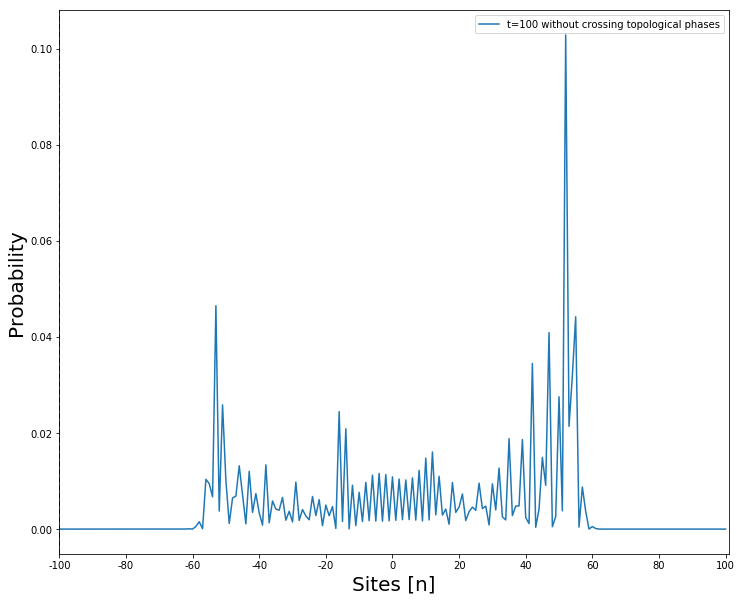

In [133]:
fig = figure(figsize=(12, 10))
ax = fig.add_subplot(111)

plot(arange(P), prob, label='t=100 without crossing topological phases')
loc = range (0, P, P//10) 
xticks(loc)
xlim(0, P)
axvline(x = 0,color='black',ls='dashed')
ax.set_xticklabels(range (-N, N+1, int(P / 10)))
xlabel('Sites [n]', size=20)
ylabel('Probability', size=20)
legend()
show()

In [117]:
prob[100]

2.8518530201539177e-13

In [136]:
N = 100
P = 2*N+1 

coin0 = array([1, 0])  
coin1 = array([0, 1])  

C00 = outer(coin0, coin0)   
C01 = outer(coin0, coin1)  
C10 = outer(coin1, coin0)  
C11 = outer(coin1, coin1)  

def Ry(theta):
    y_SU2 = cos(theta/2)*C00+sin(theta/2)*C10-sin(theta/2)*C01+cos(theta/2)*C11
    #array([[cos(theta/2), -sin(theta/2)],[sin(theta/2), cos(theta/2)]])
    return kron(eye(P),y_SU2)

ShiftPlus = roll(eye(P), 1, axis=0)
ShiftMinus = roll(eye(P), -1, axis=0)
T_up = kron(ShiftPlus, C00) + kron(eye(P), C11)
T_down = kron(ShiftMinus, C11) + kron(eye(P), C00)

def theta2(x,theta2Plus,theta2Minus):
    return (1/2)*(theta2Plus+theta2Minus)+(1/2)*(theta2Plus-theta2Minus)*tanh(x/3)

def U(x,theta2Plus,theta2Minus, theta1):
    return T_down.dot(Ry(theta2(x,theta2Plus,theta2Minus)).dot(T_up.dot(Ry(theta1))))
                      
posn0 = zeros(P)
posn0[N] = 1  
psi0 = kron(posn0, coin0)
psiN = psi0

x = -N
for i in range(N):
    x+=2           
    psiN = U(x,0,.99*pi/2, -pi/2).dot(psiN)
    
prob = empty(P)
for k in range(P):
    posn = zeros(P)
    posn[k] = 1     
    M_hat_k = kron( outer(posn,posn), eye(2))
    proj = M_hat_k.dot(psiN)
    prob[k] = proj.dot(proj.conjugate()).real

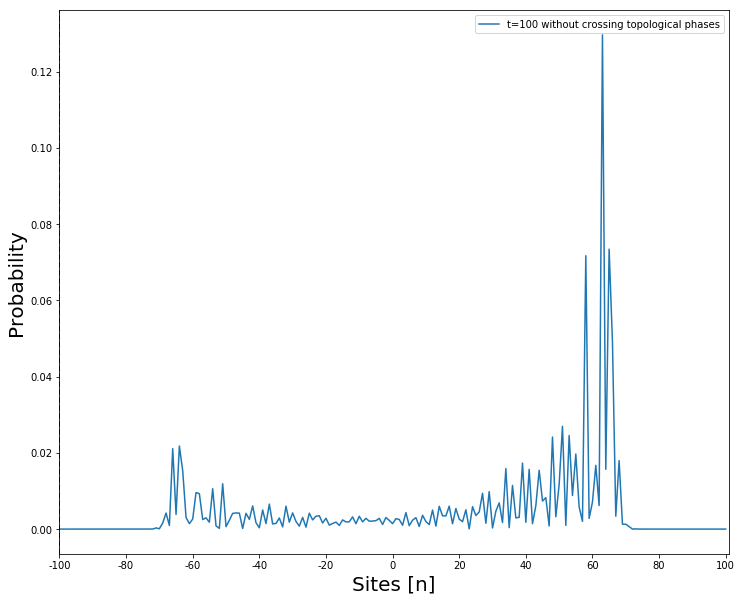

In [137]:
fig = figure(figsize=(12, 10))
ax = fig.add_subplot(111)

plot(arange(P), prob, label='t=100 without crossing topological phases')
loc = range (0, P, P//10) 
xticks(loc)
xlim(0, P)
axvline(x = 0,color='black',ls='dashed')
ax.set_xticklabels(range (-N, N+1, int(P / 10)))
xlabel('Sites [n]', size=20)
ylabel('Probability', size=20)
legend()
show()

In [138]:
prob[100]

0.0014239696869836505